# TW5 06/10/2023
## Exercice 4 :
In EDA (Exploratory Data Analysis), we rarely use matplotlib directly. We use it for highly customized visualizations. For quick plots, we can use pandas built-in plots or use external libraries, like Seaborn. We can also use more developed libraries like plotly or bokeh, allowing to create interactive visualizations and entire dashboards. Get the dataframe we used in the previous TP. Don’t forget to add a title, x labels, y labels to every plot you make! Visualizations are used to communicate with people who are nontechnical and/or who have never seen your data.
https://seaborn.pydata.org/generated/seaborn.heatmap.html
1. Use the dataframe you created on 2.25, representing the relationship between ‘moving obstacles’ and ‘transport vehicles’. Create a dataframe using this data, marking the correlation between each variable in the heatmap. Add a title and change the style of this plot. Here’s an example of the expected output:

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('Datasets/')

In [13]:
df = pd.read_csv('Datasets/vehicules_2016.csv', sep=',')
df.columns = ["Num_Acc", "sens_de_Circulation", "catV","nb_occupants", "obstacle_fixe", "obstacle_mobile","choc", "manoeuvre" , "num_vehicule"]
array_obstacle_fixe=np.array(df['obstacle_fixe'])
array_obstacle_fixe = np.nan_to_num(array_obstacle_fixe)
from mapping import *
df['catV'] = df['catV'].map(info_vehicules)
df['obstacle_fixe'] = df['obstacle_fixe'].map(obstacle_fixe_labels)
df['obstacle_mobile'] = df['obstacle_mobile'].map(obstacle_labels)

<Axes: xlabel='obstacle_mobile', ylabel='catV'>

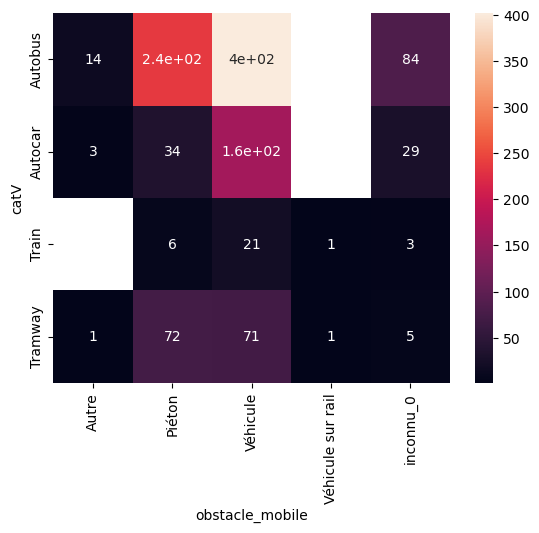

In [14]:
df2=df.groupby(['catV','obstacle_mobile'])['nb_occupants'].count().reset_index()

df3=df2.pivot(index='catV',columns='obstacle_mobile',values='nb_occupants')

public_transport_list=['Autobus','Autocar','Train','Tramway']
df3=df3.loc[public_transport_list]

df3=df3.dropna(axis=1,how='all')
sns.heatmap(df3, annot=True)

#### 4. Create a pie chart representing the frequency of ‘accident numbers’ by ‘type of moving obstacle’

In [15]:
df3['Total'] = df3.sum(axis=1)
df3.head()

obstacle_mobile,Autre,Piéton,Véhicule,Véhicule sur rail,inconnu_0,Total
catV,,,,,,
Autobus,14.0,237.0,402.0,NaN,84.0,737.0
Autocar,3.0,34.0,163.0,NaN,29.0,229.0
Train,NaN,6.0,21.0,1.0,3.0,31.0
Tramway,1.0,72.0,71.0,1.0,5.0,150.0


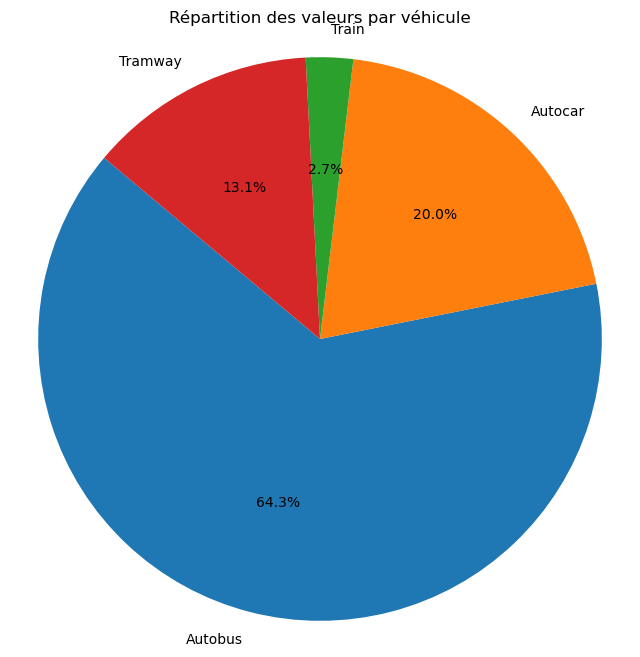

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(df3['Total'], labels=df3.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des valeurs par véhicule')
plt.axis('equal')
plt.show()

#### 1. Create a scatter plot using long and lat columns. Can you recognize the map of France? Maybe by zooming in a bit?


In [18]:
df = pd.read_csv('Datasets/caracteristiques_2016.csv', sep=',', encoding='ISO-8859-1')
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1,6.0,11,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1,3.0,11,rue Joliot curie,M,0.0,0.0,590
